# Importing Libraries

In [ ]:
import os
from IPython.display import Markdown
from unstructured.partition.pdf import partition_pdf

os.environ["OPENAI_API_KEY"] = "OPENAI_API_KEY"

# Chunking the PDF

In [2]:
file_path = 'attention.pdf'

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",
    extract_image_block_types=["Image"],
    extract_image_block_to_payload=True,
    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)

2025-05-20 12:39:07.705540: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-20 12:39:07.824255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747724947.892743  696381 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747724947.909527  696381 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-20 12:39:08.041628: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

[2025-05-20 12:39:09,906] [WARNING] [real_accelerator.py:181:get_accelerator] Setting accelerator to CPU. If you have GPU or other accelerator, we were unable to detect it.
[2025-05-20 12:39:09,908] [INFO] [real_accelerator.py:222:get_accelerator] Setting ds_accelerator to cpu (auto detect)


/bin/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


# Checking different chunks for tables and images

In [4]:
elements = chunks[0].metadata.orig_elements
chunk_text = [el for el in elements if 'NarrativeText' in str(type(el))]
chunk_text[0].to_dict()

{'type': 'NarrativeText',
 'element_id': '3f392e6e-4b1c-4e96-aef0-d1559c3385d4',
 'text': 'Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.',
 'metadata': {'detection_class_prob': 0.881513237953186,
  'coordinates': {'points': ((336.34930419921875, 201.6392311111111),
    (336.34930419921875, 313.3592529296875),
    (1365.70751953125, 313.3592529296875),
    (1365.70751953125, 201.6392311111111)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-04-28T16:04:06',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 1}}

In [5]:
elements = chunks[-3].metadata.orig_elements
chunk_tables = [el for el in elements if 'Table' in str(type(el))]
chunk_tables[0].to_dict()

{'type': 'Table',
 'element_id': '016841a0-1d0e-4e6f-ac49-3a0437852853',
 'text': 'Parser Training WSJ 23 F1 Vinyals & Kaiser el al. (2014) [37] WSJ only, discriminative 88.3 Petrov et al. (2006) [29] WSJ only, discriminative 90.4 Zhu et al. (2013) [40] WSJ only, discriminative 90.4 Dyer et al. (2016) [8] WSJ only, discriminative 91.7 Transformer (4 layers) WSJ only, discriminative 91.3 Zhu et al. (2013) [40] semi-supervised 91.3 Huang & Harper (2009) [14] semi-supervised 91.3 McClosky et al. (2006) [26] semi-supervised 92.1 Vinyals & Kaiser el al. (2014) [37] semi-supervised 92.1 Transformer (4 layers) semi-supervised 92.7 Luong et al. (2015) [23] multi-task 93.0 Dyer et al. (2016) [8] generative 93.3',
 'metadata': {'detection_class_prob': 0.9149760603904724,
  'coordinates': {'points': ((391.6229553222656, 259.5727233886719),
    (391.6229553222656, 658.9208374023438),
    (1303.801025390625, 658.9208374023438),
    (1303.801025390625, 259.5727233886719)),
   'system': 'PixelSpace',

In [6]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': 'c0eb7fec-5c20-4c44-9ec5-02e1530b1f1e',
 'text': '',
 'metadata': {'coordinates': {'points': ((486.0, 261.1805555555558),
    (486.0, 614.7805555555556),
    (664.0, 614.7805555555556),
    (664.0, 261.1805555555558)),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2025-04-28T16:04:06',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 4,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFiALIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQE

# Separate extracted elements into tables, text, and images

In [3]:
tables = []
texts = []
images = []

for chunk in chunks:
    chunk_els = chunk.metadata.orig_elements

    for el in chunk_els:
        if "NarrativeText" in str(type(el)):
            texts.append(el.text)
        if "Table" in str(type(el)):
            tables.append(el.metadata.text_as_html)
        if "Image" in str(type(el)):
            images.append(el.metadata.image_base64)

In [4]:
from IPython.display import HTML, display

def display_html_table(html_code):
    display(HTML(html_code))

display_html_table(tables[-1])

Parser,Training,WSJ 23 F1
Vinyals & Kaiser el al. (2014),"WSJ only, discriminative",88.3
Petrov et al. (2006),"WSJ only, discriminative",90.4
Zhu et al. (2013) (40),"WSJ only, discriminative",90.4
Dyer et al. (2016),"WSJ only, discriminative",91.7
Transformer (4 layers),"WSJ only, discriminative",91.3
Zhu et al. (2013) [40],semi-supervised,913
Huang & Harper (2009),semi-supervised,91.3
McClosky et al. (2006),semi-supervised,92.1
Vinyals & Kaiser el al. (2014),semi-supervised,92.1
Transformer (4 layers),semi-supervised,92.7


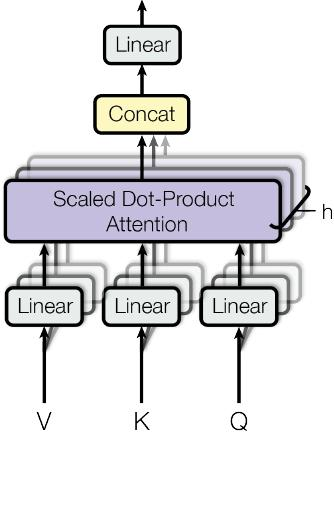

In [5]:
import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    image_data = base64.b64decode(base64_code)
    display(Image(data=image_data))

display_base64_image(images[2])

# Convert into respective summaries

In [6]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

model = ChatOpenAI(model="gpt-4o", temperature=0.5)

In [7]:
prompt_text = """
                    You are an assistant tasked with summarizing tables and text.
                    Give a detailed summary of the provided table or text.

                    Respond only with the summary, no additional comment.
                    Do not start your message by saying "Here is a summary" or anything like that.
                    Just give the summary as it is.

                    Table or text chunk: {element}
              """

prompt = ChatPromptTemplate.from_template(prompt_text)
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

# Summarize text
text_summaries = summarize_chain.batch(texts, config={"max_concurrency": 3})

# Summarize tables
table_summaries = summarize_chain.batch(tables, config={"max_concurrency": 3})

In [8]:
prompt_template_text = """   
                            Describe the image in detail. For context,
                            the image is part of a research paper explaining the transformers
                            architecture. Be specific about graphs, such as bar plots.
                       """

# Define a function to build prompt messages dynamically
def build_image_prompt(image_base64):
    return ChatPromptTemplate.from_messages([
        ("user", [
            {"type": "text", "text": prompt_template_text},
            {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}},
        ])
    ])

# Define chain
def image_summary_chain(image):
    prompt = build_image_prompt(image)
    return prompt | model | StrOutputParser()

# Batch process images manually
image_summaries = []

for img in images:
    chain = image_summary_chain(img)
    summary = chain.invoke({})
    image_summaries.append(summary)

# Vectorstore

In [9]:
import uuid
from base64 import b64decode
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain_openai import OpenAIEmbeddings
from langchain.schema.document import Document
from langchain_core.messages import HumanMessage
from langchain.retrievers.multi_vector import MultiVectorRetriever

vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())
store = InMemoryStore()
id_key = "doc_id"

retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

/tmp/ipykernel_696381/2841387073.py:10: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())


In [10]:
# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

# RAG Pipeline

In [11]:
def parse_docs(docs):
    images = []
    tables = []
    texts = []

    for doc in docs:
        if not isinstance(doc, str):
            continue  # Ignore non-string

        doc_strip = doc.strip()

        # Check if it's a table
        if doc_strip.startswith("<table") and doc_strip.endswith("</table>"):
            tables.append(doc_strip)

        # Check if it's a base64 image
        else:
            try:
                b64decode(doc_strip, validate=True)
                images.append(doc_strip)
            except Exception:
                # If decoding fails, assume it's normal text
                texts.append(doc_strip)

    return {"images": images, "texts": texts, "tables": tables}

def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = "\n\n".join(docs_by_type.get("texts", []))
    context_table = "\n\n".join(docs_by_type.get("tables", []))

    # Construct prompt with clear sectioning
    prompt_text = f"""
                        Use the following context to answer the question. The context may include descriptive text, performance tables (in HTML format), and images (provided separately).

                        Question: 
                        {user_question}

                        --- Context Text ---
                        {context_text}

                        --- Context Tables ---
                        {context_table}

                    """.strip()

    # Format for multimodal models: text and image chunks
    content = [{"type": "text", "text": prompt_text}]

    for image in docs_by_type.get("images", []):
        content.append({
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image}"}
        })

    return [HumanMessage(content=content)]

In [16]:
query = "can you please explain the attention mechanism in detail?"
retrieved_summaries = retriever.vectorstore.similarity_search(query, k=5)

retrieved_docs = []
for summary in retrieved_summaries:
    doc_id = summary.metadata["doc_id"]
    full_doc = retriever.docstore.mget([doc_id])[0]
    retrieved_docs.append(full_doc)

prepared_prompt = build_prompt({
    "context": parse_docs(retrieved_docs),
    "question": query
})

llm = ChatOpenAI(model="gpt-4o", temperature=0)
response = llm.invoke(prepared_prompt)
display(Markdown(response.content))

The attention mechanism is a crucial component in modern sequence modeling and transduction models, allowing for the modeling of dependencies without considering their distance in the input or output sequences. Here's a detailed explanation based on the provided context:

1. **Self-Attention**: Also known as intra-attention, this mechanism relates different positions within a single sequence to compute a representation of that sequence. It has been effectively used in tasks like reading comprehension, abstractive summarization, textual entailment, and learning task-independent sentence representations. Self-attention helps in understanding the syntactic and semantic structure of sentences by examining how different parts of a sequence relate to each other.

2. **Scaled Dot-Product Attention**: This is a specific type of attention mechanism. Although the context does not provide a detailed description, typically, it involves the following steps:
   - **Queries, Keys, and Values**: The input sequence is transformed into three different vectors: queries (Q), keys (K), and values (V).
   - **Dot Product**: The attention score is calculated by taking the dot product of the query with all keys, which determines the relevance of the input tokens.
   - **Scaling**: The dot product is scaled by the square root of the dimension of the keys to prevent large values that could push the softmax function into regions with small gradients.
   - **Softmax**: A softmax function is applied to obtain the attention weights.
   - **Weighted Sum**: The final output is a weighted sum of the values, where the weights are the attention scores.

3. **Multi-Head Attention**: This extends the idea of scaled dot-product attention by having multiple attention layers (or "heads") running in parallel. Each head has its own set of learned linear projections for queries, keys, and values. This allows the model to jointly attend to information from different representation subspaces at different positions. The outputs of these attention heads are concatenated and linearly transformed to produce the final output.

4. **Benefits**: The attention mechanism, particularly self-attention, can lead to more interpretable models. By examining attention distributions, one can see how different attention heads learn to perform various tasks, often aligning with the syntactic and semantic structure of the input sequences.

In summary, the attention mechanism, especially in the form of self-attention and multi-head attention, is a powerful tool in sequence modeling, enabling models to capture complex dependencies and relationships within data.